In [1]:
import numpy as np
from random import *

# Set up environment

In [2]:
####################
# Helper Functions #
####################

def accumulate(fn, initial, seq):
    if not seq:
        return initial
    else:
        return fn(seq[0], 
                  accumulate(fn, initial, seq[1:]))
    
def flatten(mat):
    return [num for row in mat for num in row]

def has_zero(mat):
    return 0 in flatten(mat)

def transpose(mat):
    return list(map(list,zip(*mat)))

# Before Transpose:
# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16

# After Transpose
# 1 5 9 13
# 2 6 10 14
# 3 7 11 15
# 4 8 12 16


def reverse(mat):
    return list(map(lambda row: list(reversed(row)),mat))

# Before Reverse:
# 1 2 3 4
# 5 6 7 8
# 9 10 11 12
# 13 14 15 16

# After Reverse
# 4 3 2 1
# 8 7 6 5
# 12 11 10 9
# 16 15 14 13


###################
# Game Matrix ADT #
###################

def new_game_matrix(n):
    matrix = []
    for i in range(n):
        matrix.append([0] * n)
    return matrix


def add_two(mat):
    if not has_zero(mat):
        return mat
    a = randint(0, len(mat)-1)
    b = randint(0, len(mat)-1)
    while mat[a][b] != 0:
        a = randint(0, len(mat)-1)
        b = randint(0, len(mat)-1)
    mat[a][b] = 2
    return mat

def game_status(mat):
#     for row in mat:
#         for element in row:
#             if element == 8192:
#                 return 'win'

    if has_zero(mat):
        return 'not over'
    for i in range(len(mat)): #Check horizontally
        for j in range(len(mat[0])-1):
            if mat[i][j] == mat[i][j+1]:
                return 'not over'
    for i in range(len(mat)-1): #Check vertically
        for j in range(len(mat[0])):
            if mat[i][j] == mat[i+1][j]:
                return 'not over'
    return 'lose'

def merge_left(matrix):
    def merge_row(row):
        merged_row, prev_tile, score_increment = [], 0, 0
        # pack element by element left-wards
        for tile in row:
            if tile == 0: continue
            if prev_tile == 0:
                prev_tile = tile
            elif prev_tile != tile:
                merged_row.append(prev_tile)
                prev_tile = tile
            else:
                merged_row.append(prev_tile*2)
                score_increment += prev_tile*2
                prev_tile = 0
        merged_row.append(prev_tile) # valid regardless whether there are merges or not
        # top up zeros
        while len(merged_row) != len(row):
            merged_row.append(0)
        return (merged_row, merged_row != row, score_increment)

    return accumulate(lambda first, rest: ([first[0]] + rest[0], 
                                            first[1] or rest[1], 
                                            first[2] + rest[2]),
                      ([], False, 0),
                      list(map(merge_row, matrix)))

def merge_right(mat):
    mat, valid, score = merge_left(reverse(mat))
    return (reverse(mat), valid, score)

def merge_up(mat):
    mat, valid, score = merge_left(transpose(mat))
    return (transpose(mat), valid, score)

def merge_down(mat):
    mat, valid, score = merge_left(reverse(transpose(mat)))
    return (transpose(reverse(mat)), valid, score)


###################
# Game Record ADT #
###################
                
def make_new_record(mat, score):
    return (mat, score)
def get_record_matrix(record):
    return record[0]
def get_record_score(record):
    return record[1]


####################
# Game Records ADT #
####################

def new_records():
    return []
def add_record(new_record, records):
    NUM_OF_UNDOS = 3
    records.append(new_record)
    if num_of_records(records) > NUM_OF_UNDOS:
        records = records[-NUM_OF_UNDOS:]
    return records
def num_of_records(records):
    return len(records)
def is_empty(records):
    return num_of_records(records) <= 0
def pop_last_record(records):
    if not is_empty(records):
        last_record = records.pop()
        return (get_record_matrix(last_record),
                get_record_score(last_record),
                records)
    else:
        return (None, None, records)

##################
# Game State ADT #
##################

def make_state(matrix, total_score, history):
    return (matrix, total_score, history)
def get_matrix(state):
    return state[0]
def get_score(state):
    return state[1]
def get_history(state):
    return state[2]
def make_new_game(n):
    starting_matrix = add_two(add_two(new_game_matrix(n)))
    return make_state(starting_matrix, 0, new_records())

def execute_move(state, matrix_updater):   
    current_score = get_score(state)
    next_matrix, valid_move, score_increment = matrix_updater(get_matrix(state))
    if not valid_move:
        return (state, False)
    else:
        updated_history = ()
        updated_state = make_state(add_two(next_matrix),
                                   current_score + score_increment,
                                   updated_history)
        return (updated_state, True)
def left(state):
    return execute_move(state, merge_left)
def right(state):
    return execute_move(state, merge_right)
def up(state):
    return execute_move(state, merge_up)
def down(state):
    return execute_move(state, merge_down)

def undo(state):
    records = get_history(state)
    matrix, score, records = pop_last_record(records)
    if matrix:
        return (make_state(matrix, score, records), True)
    else:
        return (state, False)    

game_logic = {
    'make_new_game': make_new_game,
    'game_status': game_status,
    'get_score': get_score,
    'get_matrix': get_matrix,
    'up': up,
    'down': down,
    'left': left,
    'right': right,
    'undo': undo
}

# Board State Printing Helper Function

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def printboardstate(boardstate):
    mat, score, _ = boardstate
    sns.heatmap(mat, annot = True, 
            square = True, cbar = False, cmap = 'YlOrBr', fmt = 'd')
    plt.title('Game State with Score ' + str(score))
    plt.axis('off')
    plt.show()

# Random AI

In [3]:
def random_move(current_state):
    index = np.random.randint(4)
    return ["up", "down", "left", "right"][index]

Initial state:


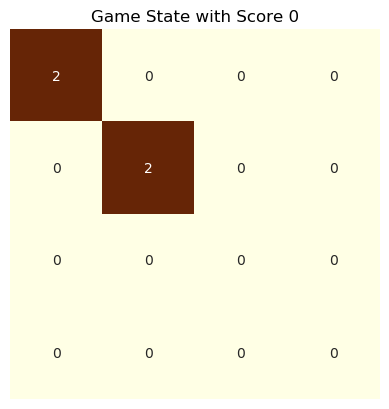

Final state:


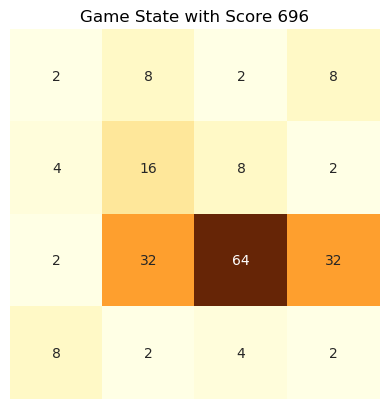

In [5]:
current_state = make_new_game(4)

print('Initial state:')
printboardstate(current_state)

while game_status(get_matrix(current_state)) == "not over":
    best_move = random_move(current_state)
    best_move = game_logic[best_move]
    current_state, _ = best_move(current_state)
    
print('Final state:')
printboardstate(current_state)

# Monte Carlo AI

In [43]:
def playthrough(gamestate, num_tries, max_depth):
    ''' Takes in a game state, and plays randomly till the end num_tries times, returns the final score '''
    score = 0
    for i in range(num_tries):
        newstate = gamestate
        depth = 0
        while game_status(get_matrix(newstate)) == "not over" and depth<max_depth:
            best_move = random_move(newstate)
            best_move = game_logic[best_move]
            newstate, _ = best_move(newstate)
            
            depth += 1
        score += newstate[1]
    
    return score/num_tries

Initial state:


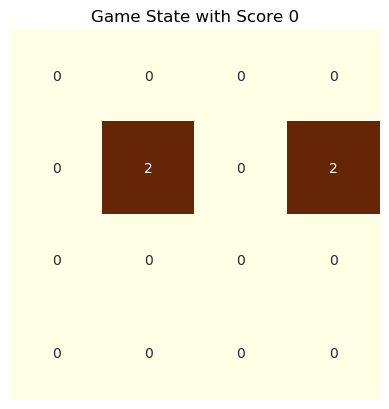

Score:
4 4 4 4 12 20 20 20 24 32 36 52 56 68 68 72 80 96 132 132 136 148 148 148 156 164 164 164 180 184 192 200 208 224 260 324 328 328 332 344 352 372 372 372 380 388 392 400 416 452 452 452 456 464 464 468 472 480 500 504 504 508 516 520 528 548 548 548 552 564 568 576 576 580 580 596 628 628 636 640 712 844 852 872 880 880 916 916 920 928 948 948 948 956 964 968 976 992 1024 1028 1028 1100 1108 1112 1120 1120 1124 1124 1124 1132 1140 1160 1168 1188 1188 1192 1192 1224 1228 1240 1244 1252 1268 1268 1272 1272 1272 1288 1288 1288 1300 1316 1352 1352 1424 1552 1820 1828 1828 1832 1840 1860 1860 1860 1868 1876 1892 1928 1940 1940 1940 1940 1944 1948 1956 1976 1976 1976 1976 1992 2000 2000 2020 2024 2024 2056 2060 2136 2140 2148 2164 2164 2168 2172 2180 2184 2192 2208 2212 2212 2212 2244 2252 2260 2264 2268 2276 2276 2280 2284 2292 2308 2308 2312 2324 2328 2328 2356 2388 2388 2388 2392 2456 2588 2600 2616 2620 2632 2640 2640 2660 2692 2696 2696 2696 2708 2712 2712 2712 2716 2716 2728 274

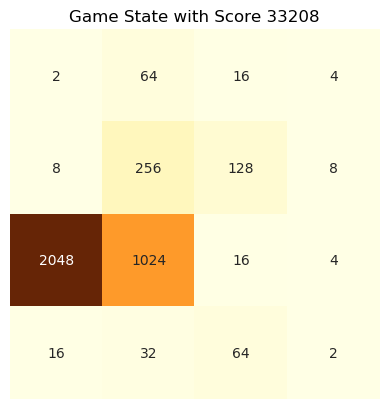

In [44]:
initial_state = make_new_game(4)
# initial_state = ([[0, 0, 0, 0], [8, 2, 0, 0], [4, 0, 0, 0], [4, 64, 8, 2]], 348, ())

print('Initial state:')
printboardstate(initial_state)

num_tries = 200
max_depth = 
    
current_state = initial_state
print('Score:')
while game_status(get_matrix(current_state)) == "not over":
    # Only evaluate for valid moves
    bestscore = -1
    bestmove = ""
    
    for move in ['up', 'down', 'left', 'right']:
        _, valid = game_logic[move](current_state)
        if not valid: continue
        
        # perform monte carlo simulation for each of the valid moves
        montecarlo_state, _ = game_logic[move](current_state)
        montecarlo_score = playthrough(montecarlo_state, num_tries, max_depth)
        if montecarlo_score > bestscore:
            bestscore = montecarlo_score
            bestmove = move
    
    # do the move with the highest score
    current_state, _ = game_logic[bestmove](current_state)
    
#     print('Best move:', bestmove, 'Score:', current_state[1])
    print(current_state[1], end = ' ')
    
print('Final state:')
printboardstate(current_state)


# Monte Carlo Tree Search based AI

Initial state:


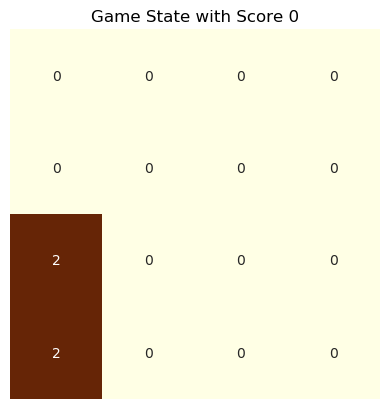

Score:
4 4 4 4 4 8 8 12 24 32 36 40 48 68 68 68 68 76 84 100 132 132 132 144 152 160 180 180 180 180 184 196 200 204 212 232 268 268 340 340 344 352 352 356 360 376 380 384 392 392 392 400 408 412 412 440 472 476 476 480 480 480 492 496 520 524 532 532 552 584 648 656 792 796 808 824 824 824 824 840 840 848 868 900 904 904 912 920 920 920 924 928 936 952 956 968 976 992 992 1028 1096 1096 1096 1096 1100 1112 1120 1128 1144 1152 1156 1156 1160 1172 1188 1220 1220 1224 1228 1232 1240 1240 1244 1244 1248 1256 1280 1288 1296 1316 1348 1416 1544 1808 1812 1816 1816 1816 1820 1828 1844 1844 1856 1864 1872 1892 1892 1892 1924 1928 1928 1932 1932 1932 1940 1952 1960 1972 1972 1972 1976 1976 1976 1996 2008 2012 2012 2024 2036 2052 2068 2100 2168 2168 2172 2176 2176 2176 2176 2196 2200 2208 2224 2256 2260 2260 2260 2260 2276 2292 2292 2308 2312 2324 2340 2340 2376 2440 2572 2572 2580 2584 2592 2592 2592 2616 2620 2620 2624 2632 2636 2644 2664 2668 2672 2712 2720 2740 2740 2740 2740 2744 2748 275

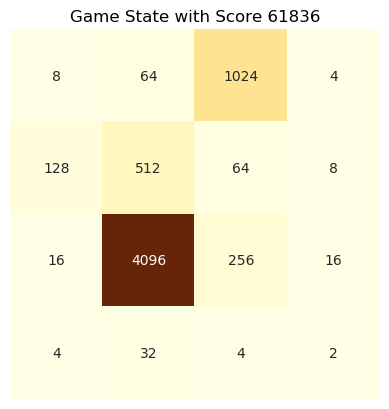

In [47]:
initial_state = make_new_game(4)

print('Initial state:')
printboardstate(initial_state)

debug = False

initial_tries = 20
num_tries = 400
max_depth = 15

indextomove = {0: 'up', 1: 'down', 2: 'left', 3: 'right'}
movetoindex = {'up': 0, 'down': 1, 'left': 2, 'right': 3}
    
current_state = initial_state
print('Score:')
while game_status(get_matrix(current_state)) == "not over":
    # Only evaluate for valid moves
    bestscore = -1
    bestmove = ""
    validmoves = []
    
    action_score = np.array([0, 0, 0, 0])
    action_tries = np.array([0, 0, 0, 0])
    
    exploration_tries, exploration_score = 0, 0
    
    maxscore = 0
    
    for move in ['up', 'down', 'left', 'right']:
        _, valid = game_logic[move](current_state)
        if valid: validmoves.append(move)
        # if not valid, still increment the initial tries variable for that move to avoid division by 0
        else: 
            action_tries[movetoindex[move]] = initial_tries
            action_score[movetoindex[move]] = -1000000
            continue
        
        # do an initial exploration of each valid move
        for tries in range(initial_tries):
            # perform monte carlo simulation for that move
            montecarlo_state, _ = game_logic[move](current_state)
            montecarlo_score = playthrough(montecarlo_state, 1, max_depth)

            # add the score and tries to the action node
            maxindex = movetoindex[move]
            action_tries[maxindex] += 1
            action_score[maxindex] += montecarlo_score
            
#             exploration_tries += 1
#             exploration_score += montecarlo_score
            
            maxscore = max(maxscore, montecarlo_score)
    
    # we peg the exploration constant to the average montecarlo score of the initial trials
    c = maxscore
#     c = 10
            
    for totaltries in range(num_tries):
        
        # perform an explore-exploit tradeoff calculation to find out which move to go first
        action_heuristic = action_score/action_tries + c*np.sqrt(np.log(totaltries+1)/action_tries)
        
#         print(action_heuristic)
#         print(np.sqrt((totaltries+1)/action_tries))
#         print('Exploration',c*np.sqrt(np.log(totaltries+1)/action_tries))
        
        maxindex = np.argmax(action_heuristic)        
        move = indextomove[maxindex]
        
        # perform monte carlo simulation for that move
        montecarlo_state, _ = game_logic[move](current_state)
        montecarlo_score = playthrough(montecarlo_state, 1, max_depth)
        
        # add the score and tries to the action node
        action_tries[maxindex] += 1
        action_score[maxindex] += montecarlo_score
        
        
    if debug:
        print('Exploration Factor', c)
        print('Number of tries', action_tries)
        print('Average score', action_score/action_tries)

        
    # best move is the highest score
#     bestmoveindex = np.where(action_tries == max(action_tries))[0][0]
    bestmoveindex = np.argmax(action_score/action_tries)
    bestmove = indextomove[bestmoveindex]
    
    # do the move with the highest score
    current_state, _ = game_logic[bestmove](current_state)
    
    if debug:
        print('Best move:', bestmove)
    print(current_state[1], end = ' ')

print('Final state:')
printboardstate(current_state)

# Minimax-ish algorithm with score reward

In [5]:
branches = 2
steps = 3
decay = 0.9

def get_score_difference(new_state, state):
    if game_status(get_matrix(new_state)) == "lose" or game_status(get_matrix(state)) == "lose":
        return -20000
    elif game_status(get_matrix(new_state)) == "win":
        return 20000
    else:
        return get_score(new_state) - get_score(state)

def get_future_score(state, steps, decay):
    if steps == 0:
        return 0
    
    direction_scores = []
    for action in (up, down, left, right):
        future_states = []
        for i in range(branches):
            future_states.append(action(state))
        future_states = [x[0] for x in future_states if x[1]]
            
        if not future_states:
            continue
        score_differences = []
        for future_state in future_states:
            score_differences.append(get_score_difference(future_state, state))
            
        future_scores = []
        for future_state in future_states:
            future_scores.append(get_future_score(future_state, steps - 1, decay))
        direction_scores.append(min(score_differences) + decay * min(future_scores))
    
    if not direction_scores:
        return -20000
    return max(direction_scores)

def get_move_score(state, action):
    new_state, valid = action(state)
    if not valid:
        return -1000000
    return get_score_difference(new_state, state) + get_future_score(new_state, steps, decay)

def get_best_move(state):
    move_scores = []
    for action in [left, right, up, down]:
        move_scores.append(get_move_score(state, action))
    max_index = 0
    max_score = -10000000
    for i in range(4):
        if move_scores[i] > max_score:
            max_score = move_scores[i]
            max_index = i
    return ["left", "right", "up", "down"][max_index]

In [14]:
current_state = make_new_game(4)

In [15]:
current_state

([[2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [2, 0, 0, 0]], 0, [])

In [16]:
while game_status(get_matrix(current_state)) == "not over":
    best_move = get_best_move(current_state)
    best_move = game_logic[best_move]
    current_state, _ = best_move(current_state)
    
current_state

([[32, 8, 2048, 4], [2, 8, 32, 64], [0, 0, 0, 4], [0, 0, 0, 2]], 21096, ())